In [69]:
import dataframes as RAW
import cleaning as CLEAN
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [351]:
RAW.character_data.head()

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [352]:
RAW.movie_data.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [353]:
RAW.summaries.head()

,Wiki ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [354]:
RAW.character_names.head()

,Character name,Freebase ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [355]:
RAW.tvtropes.head()

,Character type,Character name,Movie,Freebase ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [26]:
#Make copy 
cleaned_movie_data = RAW.movie_data.copy()

In [27]:
#Filtering-out genres which are NaN
cleaned_movie_data = cleaned_movie_data.dropna(subset=['Genres'])

In [28]:
#Only keeps the values of the dictionaries
def extract_genres(genre_str):
    try:
        genre_dict = ast.literal_eval(genre_str)
        return list(genre_dict.values())
    except (ValueError, SyntaxError) as e:
        print(f"Error converting string to dictionary. Error: {e}")
        return []

In [29]:
#Apply the cleaning function to data. Generates the new "Genres" column
Cleaned_genres = cleaned_movie_data['Genres'].apply(extract_genres)

In [30]:
#Inject the new "Genres" in
#Movie data without NaN and with cleaned up Genres
cleaned_movie_data["Genres"] = Cleaned_genres

In [31]:
#Makes sure to only keep movies with actors in our character metadata
#common_wiki_ids = cleaned_movie_data[cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"])]
result_cleaned_movie_data = cleaned_movie_data[cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"])]

In [32]:
#Counts the numbers of appearance of each genre in all movies
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

In [33]:
# Set your threshold value
threshold = 2000  

# Filter out genres below the threshold
filtered_genres = genre_counts[genre_counts >= threshold].index.tolist()

# Creates filter for the original DataFrame based on the threshold
filtered_genres = result_cleaned_movie_data.apply(lambda row: [genre for genre in row['Genres'] if genre in filtered_genres], axis=1)

In [34]:
#Inject the modified "Genres" in
result_cleaned_movie_data["Genres"] = filtered_genres

<ipython-input-34-bb0200473c28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cleaned_movie_data["Genres"] = filtered_genres


In [35]:
#Counts the counts for each genre in all movies after threshold filter
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

In [36]:
#To visualise the kept genres and their number of appearances
genre_counts

Drama               28490
Comedy              14516
Romance Film         9087
Thriller             8070
Action               7806
Black-and-white      7358
World cinema         7013
Indie                6216
Crime Fiction        5967
Horror               4588
Action/Adventure     4546
Short Film           4510
Adventure            4258
Silent film          3998
Family Film          3644
Musical              3491
Romantic drama       3314
Mystery              2799
Science Fiction      2672
Romantic comedy      2584
Fantasy              2406
Comedy film          2405
Animation            2153
War film             2093
Crime Thriller       2093
Name: Genres, dtype: int64

In [37]:
#List of genres after threshold filtering
unique_genres_list = genre_counts.index.tolist()
unique_genres_list

['Drama',
 'Comedy',
 'Romance Film',
 'Thriller',
 'Action',
 'Black-and-white',
 'World cinema',
 'Indie',
 'Crime Fiction',
 'Horror',
 'Action/Adventure',
 'Short Film',
 'Adventure',
 'Silent film',
 'Family Film',
 'Musical',
 'Romantic drama',
 'Mystery',
 'Science Fiction',
 'Romantic comedy',
 'Fantasy',
 'Comedy film',
 'Animation',
 'War film',
 'Crime Thriller']

In [38]:
#Merging the modified Genres to the characters
character_data_ft_Genres = pd.merge(RAW.character_data, result_cleaned_movie_data[['Wiki ID', 'Genres']], on='Wiki ID', how='left')

In [39]:
#Deletes any row which does not have any genre after threshold filtering
character_data_ft_Genres = character_data_ft_Genres[character_data_ft_Genres['Genres'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

In [40]:
#Creates the Genre columns filled with value 0
unique_genres_list

for Genre in unique_genres_list:
    character_data_ft_Genres[Genre] = 0

In [373]:
#Adds 1 if the Genre of the character's movie is present
for Genre in unique_genres_list:
    character_data_ft_Genres[Genre] = character_data_ft_Genres['Genres'].apply(lambda x: 1 if Genre in x else 0)

In [374]:
# Initialize a dictionary to store genre counts for each actor
actor_genre_counts = {}

# Iterate over each row and update the genre counts for each actor
for index, row in character_data_ft_Genres.iterrows():
    actor_name = row['Actor name']
    genres = row['Genres']
    
    if actor_name not in actor_genre_counts:
        actor_genre_counts[actor_name] = {genre: 0 for genre in unique_genres_list}
    
    for genre in genres:
        if genre in unique_genres_list:
            actor_genre_counts[actor_name][genre] += 1

# Create a new DataFrame from the dictionary
actor_genre_counts_df = pd.DataFrame.from_dict(actor_genre_counts, orient='index')

In [375]:
#Final dataframe
actor_genre_counts_df

,Drama,Comedy,Romance Film,Thriller,Action,Black-and-white,World cinema,Indie,Crime Fiction,Horror,...,Musical,Romantic drama,Mystery,Science Fiction,Romantic comedy,Fantasy,Comedy film,Animation,Crime Thriller,War film
Wanda De Jesus,6,1,0,6,5,0,0,2,6,1,...,0,0,1,2,0,0,0,0,5,0
Natasha Henstridge,10,5,5,8,8,0,1,0,8,4,...,0,2,0,5,2,1,0,0,3,0
Ice Cube,13,13,1,6,10,0,0,1,8,2,...,0,0,0,1,0,0,1,0,3,1
Jason Statham,13,5,2,23,23,0,1,1,17,1,...,1,1,1,3,0,2,0,1,11,0
Clea DuVall,18,9,6,11,2,0,0,9,6,5,...,0,1,7,4,4,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violet Bronte,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
Sonny Byrkett,2,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0
Susan Byrkett,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
Hal Cleaveland,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
def scatter_plot(x, y, x_label='X-axis', y_label='Y-axis', title='Scatter Plot'):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual DataFrame)
data = {
    'Movie': ['Movie1', 'Movie2', 'Movie3'],
    'Action': [1, 0, 1],
    'Drama': [1, 1, 0],
    'Comedy': [0, 1, 0]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Melt the DataFrame to transform genre columns into rows
melted_df = df.melt(id_vars=['Movie'], var_name='Genre', value_name='Belongs')

# Filter to keep only rows where the movie belongs to the genre
melted_df = melted_df[melted_df['Belongs'] == 1]

# Create scatter plots for each genre using Matplotlib
plt.figure(figsize=(12, 8))

# Create a dictionary to store movie titles for each data point
movies_dict = {i: movie for i, movie in enumerate(melted_df['Movie'])}

for i, genre in enumerate(melted_df['Genre'].unique()):
    plt.subplot(1, len(melted_df['Genre'].unique()), i + 1)
    genre_data = melted_df[melted_df['Genre'] == genre]
    plt.scatter(genre_data['Genre'], genre_data['Movie'])
    plt.title(f'Genre: {genre}')
    plt.xlabel('Genre')
    plt.ylabel('Movie')
    plt.xticks([])
    plt.yticks([])

    def show_movie_title(event):
        if event.artist == plt.gca().collections[0]:
            ind = event.ind[0]
            plt.gca().set_title(f'Movie: {movies_dict[ind]}')

    plt.gcf().canvas.mpl_connect('motion_notify_event', show_movie_title)

plt.suptitle('Scatter Plots for Genres')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Sample data (replace this with your actual DataFrame)
data = {
    'Movie': ['Movie1', 'Movie2', 'Movie3'],
    'Action': [1, 0, 1],
    'Drama': [1, 1, 0],
    'Comedy': [0, 1, 0]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Melt the DataFrame to transform genre columns into rows
melted_df = df.melt(id_vars=['Movie'], var_name='Genre', value_name='Belongs')

# Filter to keep only rows where the movie belongs to the genre
melted_df = melted_df[melted_df['Belongs'] == 1]

# Get unique genres
unique_genres = melted_df['Genre'].unique()

# Plot violin plots for each genre using Seaborn
plt.figure(figsize=(12, 8))
for genre in unique_genres:
    genre_data = melted_df[melted_df['Genre'] == genre]
    sns.violinplot(data=genre_data, x='Genre', y=None)
plt.xlabel('Genre')
plt.ylabel('Presence')
plt.title('Violin Plot for Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
movie_lin = RAW.movie_data.copy()
character_lin = RAW.character_data.copy()

In [9]:
movie_lin = movie_lin[["Wiki ID", "Movie name", "Revenue", "Runtime", "Genres"]]
character_lin = character_lin[["Wiki ID", "Actor gender", "Actor height", "Actor age at release"]] #Actor name?

In [10]:
movie_lin = movie_lin.dropna()
character_lin = character_lin.dropna()

In [11]:
# Assuming character_lin is your dataframe
character_lin['Actor gender'] = character_lin['Actor gender'].replace({'F': 0, 'M': 1})

In [13]:
character_lin = character_lin.groupby('Wiki ID').mean().reset_index()

In [20]:
merged_df = pd.merge(movie_lin, character_lin, on = "Wiki ID", how ="inner")

In [21]:
merged_df

,Wiki ID,Movie name,Revenue,Runtime,Genres,Actor gender,Actor height,Actor age at release
0,975900,Ghosts of Mars,14010832.0,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.444444,1.744333,39.111111
1,10408933,Alexander's Ragtime Band,3600000.0,106.0,"{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",0.666667,1.753667,25.666667
2,171005,Henry V,10161099.0,137.0,"{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",0.750000,1.731083,41.916667
3,77856,Mary Poppins,102272727.0,139.0,"{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",0.428571,1.740857,37.142857
4,612710,New Rose Hotel,21521.0,92.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.400000,1.707200,37.800000
...,...,...,...,...,...,...,...,...
7550,1191380,Wilde,2158775.0,118.0,"{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ...",0.600000,1.776000,36.700000
7551,54540,Coming to America,288752301.0,117.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",0.785714,1.791414,38.928571
7552,7761830,Spaced Invaders,15369573.0,100.0,"{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",0.250000,1.515000,28.250000
7553,1918494,State and Main,6944471.0,106.0,"{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",0.769231,1.735462,44.538462


In [23]:
#Apply the cleaning function to data. Generates the new "Genres" column
Cleaned_genres = merged_df['Genres'].apply(extract_genres)
#Inject the new "Genres" in
#Movie data without NaN and with cleaned up Genres
merged_df["Genres"] = Cleaned_genres

In [25]:
merged_df["Genres"]

0       [Thriller, Science Fiction, Horror, Adventure,...
1                      [Musical, Comedy, Black-and-white]
2       [Costume drama, War film, Epic, Period piece, ...
3       [Children's/Family, Musical, Fantasy, Comedy, ...
4       [Thriller, Science Fiction, Future noir, Indie...
                              ...                        
7550    [LGBT, Biography, Japanese Movies, History, Ga...
7551    [Romantic comedy, Comedy of manners, Drama, Co...
7552    [Alien Film, Science Fiction, Family Film, Com...
7553                          [Parody, Americana, Comedy]
7554    [Thriller, Erotic thriller, Psychological thri...
Name: Genres, Length: 7555, dtype: object

In [41]:
#Creates the Genre columns filled with value 0
unique_genres_list

for Genre in unique_genres_list:
    merged_df[Genre] = 0
#Adds 1 if the Genre of the character's movie is present
for Genre in unique_genres_list:
    merged_df[Genre] = merged_df['Genres'].apply(lambda x: 1 if Genre in x else 0)

In [44]:
merged_df = merged_df.drop(columns = ["Genres"])

In [45]:
merged_df

,Wiki ID,Movie name,Revenue,Runtime,Actor gender,Actor height,Actor age at release,Drama,Comedy,Romance Film,...,Musical,Romantic drama,Mystery,Science Fiction,Romantic comedy,Fantasy,Comedy film,Animation,War film,Crime Thriller
0,975900,Ghosts of Mars,14010832.0,98.0,0.444444,1.744333,39.111111,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10408933,Alexander's Ragtime Band,3600000.0,106.0,0.666667,1.753667,25.666667,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,171005,Henry V,10161099.0,137.0,0.750000,1.731083,41.916667,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,77856,Mary Poppins,102272727.0,139.0,0.428571,1.740857,37.142857,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,612710,New Rose Hotel,21521.0,92.0,0.400000,1.707200,37.800000,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,1191380,Wilde,2158775.0,118.0,0.600000,1.776000,36.700000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7551,54540,Coming to America,288752301.0,117.0,0.785714,1.791414,38.928571,1,1,1,...,0,0,0,0,1,0,0,0,0,0
7552,7761830,Spaced Invaders,15369573.0,100.0,0.250000,1.515000,28.250000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7553,1918494,State and Main,6944471.0,106.0,0.769231,1.735462,44.538462,0,1,0,...,0,0,0,0,0,0,0,0,0,0


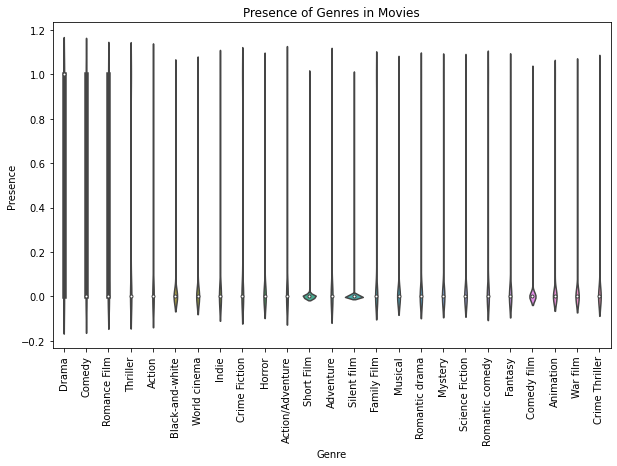

In [46]:
violin_df = merged_df.iloc[:, 7:]

melted_df = violin_df.melt(var_name = "Genre", value_name="Presence")

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Genre', y='Presence', data=melted_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Presence')
plt.title('Presence of Genres in Movies')
plt.show()

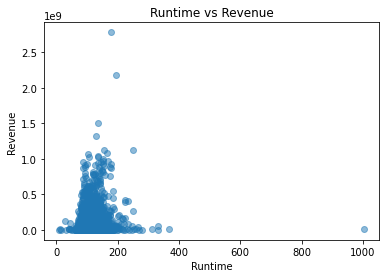

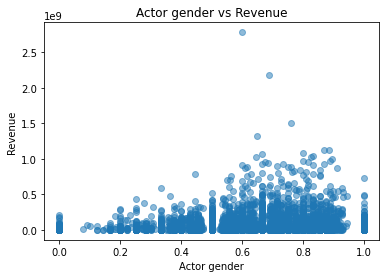

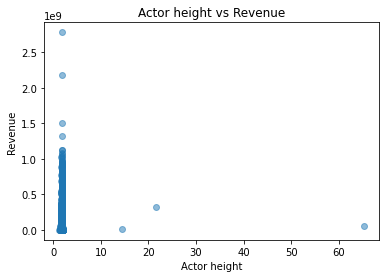

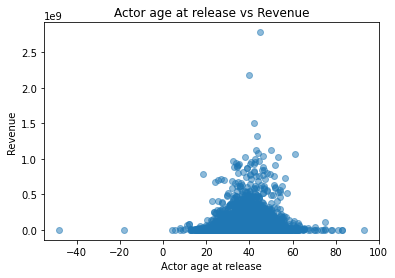

In [48]:
def scatter_plot(data, x_variable, y_variable):
    plt.figure(figsize=(6, 4))
    plt.scatter(data[x_variable], data[y_variable], alpha=0.5)
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(f"{x_variable} vs {y_variable}")
    plt.show()

variables_to_plot = ['Runtime', 'Actor gender', 'Actor height', 'Actor age at release']

for variable in variables_to_plot:
    scatter_plot(merged_df, variable, "Revenue")

In [49]:
tall_actors = merged_df[merged_df['Actor height'] > 2.0]

In [50]:
tall_actors

,Wiki ID,Movie name,Revenue,Runtime,Actor gender,Actor height,Actor age at release,Drama,Comedy,Romance Film,...,Musical,Romantic drama,Mystery,Science Fiction,Romantic comedy,Fantasy,Comedy film,Animation,War film,Crime Thriller
336,22291276,More Than a Game,960387.0,100.0,1.000000,2.030000,24.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,1291587,Vanity Fair,19463185.0,137.0,0.642857,14.484857,41.000000,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1628,30865068,Bride of Chucky,50692188.0,89.0,0.625000,65.275375,33.250000,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2818,76387,The Thing,1950000.0,87.0,1.000000,2.007000,27.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6078,2040976,American Pop,6000000.0,95.0,1.000000,2.010000,38.000000,1,0,0,...,1,0,0,0,0,0,0,1,0,0
7398,179326,101 Dalmatians,320689294.0,103.0,0.666667,21.602000,40.333333,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
louche = RAW.character_data[RAW.character_data["Wiki ID"] == 30865068]
louche


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
49649,30865068,/m/02ml14,1998-10-15,Jade,1978-11-24,F,1.750,/m/013xrm,Katherine Heigl,19.0,/m/0jvsrz,/m/04fgylw,/m/025b5y
49650,30865068,/m/02ml14,1998-10-15,Tiffany,1958-09-16,F,1.690,/m/04y8_bm,Jennifer Tilly,40.0,/m/0jvsrn,/m/03bz4ry,/m/03jjzf
49651,30865068,/m/02ml14,1998-10-15,Charles Lee Ray,1950-03-18,M,1.750,NaN,Brad Dourif,48.0,/m/0jvsrt,/m/06jpdm,/m/02bfmn
49652,30865068,/m/02ml14,1998-10-15,Jesse,1971-03-04,M,1.829,NaN,Nick Stabile,27.0,/m/052bbnm,/m/0hn9rw1,/m/0bbw41
49653,30865068,/m/02ml14,1998-10-15,Damien,1969-07-28,F,1.720,/m/041rx,Alexis Arquette,29.0,/m/052bbns,/m/0h35_4s,/m/02zjrf
49654,30865068,/m/02ml14,1998-10-15,David,1970-06-12,M,1.664,/m/044038p,Gordon Michael Woolvett,28.0,/m/052bbny,/m/0hn9rx6,/m/03dwq
49655,30865068,/m/02ml14,1998-10-15,Lt. Preston,1937-04-03,M,NaN,NaN,Lawrence Dane,61.0,/m/0cg8_82,/m/0hn9rw8,/m/0jy6k5
49656,30865068,/m/02ml14,1998-10-15,Chief Warren Kincaid,1948-09-17,M,1.800,NaN,John Ritter,50.0,/m/0cs8czp,/m/0h26dm5,/m/01nzz8
49657,30865068,/m/02ml14,1998-10-15,Russ,1970-02-09,M,NaN,NaN,James Gallanders,28.0,/m/0gc8c3k,/m/0hn9rxg,/m/02nx0c_
49658,30865068,/m/02ml14,1998-10-15,Diane,1972,F,NaN,NaN,Janet Kidder,26.0,/m/0hn9rwh,/m/0hn9rwl,/m/0d7gzc


In [57]:
tooyoung_actors = merged_df[merged_df['Actor age at release'] < 0.0]

In [58]:
tooyoung_actors

,Wiki ID,Movie name,Revenue,Runtime,Actor gender,Actor height,Actor age at release,Drama,Comedy,Romance Film,...,Musical,Romantic drama,Mystery,Science Fiction,Romantic comedy,Fantasy,Comedy film,Animation,War film,Crime Thriller
2092,73930,Greed,274827.0,246.0,1.0,1.80,-48.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2266,2640146,The Shiralee,920000.0,99.0,0.0,1.49,-18.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
louche = RAW.character_data[RAW.character_data["Wiki ID"] == 73930]
louche


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
6666,73930,/m/0jsjm,1924,Robert,1972-11-07,M,1.80,NaN,Jason London,-48.0,/m/01xrptw,/m/02nwfsk,/m/04kdmg
6667,73930,/m/0jsjm,1924,NaN,1894-01-03,F,1.68,NaN,ZaSu Pitts,NaN,/m/0jy_mq,NaN,/m/01lr4p
6668,73930,/m/0jsjm,1924,NaN,1877-01-04,M,NaN,NaN,Gibson Gowland,NaN,/m/0jy_mw,NaN,/m/09vlq1
6669,73930,/m/0jsjm,1924,NaN,1886-07-12,M,1.80,/m/0dqqwy,Jean Hersholt,NaN,/m/0jy_n0,NaN,/m/0hglv
6670,73930,/m/0jsjm,1924,NaN,1884-02-02,F,NaN,NaN,Tempe Pigott,NaN,/m/0jy_nb,NaN,/m/0jy_md
6671,73930,/m/0jsjm,1924,NaN,1886-01-11,M,1.65,NaN,Chester Conklin,NaN,/m/0jy_nh,NaN,/m/07__pr
6672,73930,/m/0jsjm,1924,NaN,1870-02-08,M,1.89,NaN,Lon Poff,NaN,/m/03z8qvg,NaN,/m/0k7g8k
6673,73930,/m/0jsjm,1924,NaN,1880-05-28,M,NaN,NaN,Jack Curtis,NaN,/m/040tsk7,NaN,/m/03c64q7
6674,73930,/m/0jsjm,1924,NaN,1903-06-21,F,NaN,NaN,Joan Standing,20.0,/m/040tskd,NaN,/m/03cxhf6
6675,73930,/m/0jsjm,1924,NaN,1885-06-17,F,1.60,NaN,Dale Fuller,NaN,/m/040tskk,NaN,/m/03cxjm8


In [74]:
merged_df

,Wiki ID,Movie name,Revenue,Runtime,Actor gender,Actor height,Actor age at release,Drama,Comedy,Romance Film,...,Musical,Romantic drama,Mystery,Science Fiction,Romantic comedy,Fantasy,Comedy film,Animation,War film,Crime Thriller
0,975900,Ghosts of Mars,14010832.0,98.0,0.444444,1.744333,39.111111,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10408933,Alexander's Ragtime Band,3600000.0,106.0,0.666667,1.753667,25.666667,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,171005,Henry V,10161099.0,137.0,0.750000,1.731083,41.916667,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,77856,Mary Poppins,102272727.0,139.0,0.428571,1.740857,37.142857,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,612710,New Rose Hotel,21521.0,92.0,0.400000,1.707200,37.800000,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,1191380,Wilde,2158775.0,118.0,0.600000,1.776000,36.700000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7551,54540,Coming to America,288752301.0,117.0,0.785714,1.791414,38.928571,1,1,1,...,0,0,0,0,1,0,0,0,0,0
7552,7761830,Spaced Invaders,15369573.0,100.0,0.250000,1.515000,28.250000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7553,1918494,State and Main,6944471.0,106.0,0.769231,1.735462,44.538462,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#linearity for two continuous variables
def correlation_for_all_pairs(data, columns):
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            print(f"Correlation between {columns[i]} and {columns[j]}:")
            correlation_cc_l(data, columns[i], columns[j])
            print("="*30)

# Assuming merged_df is your dataframe and columns_list contains the column names you want to consider
columns_list = ["Revenue", "Runtime", "Actor gender", "Actor height", "Actor age at release"]
correlation_for_all_pairs(merged_df, columns_list)


Correlation between Revenue and Runtime:
Pearson correlation coefficient: 0.19
P-value: 0.00
Correlation between Revenue and Actor gender:
Pearson correlation coefficient: 0.08
P-value: 0.00
Correlation between Revenue and Actor height:
Pearson correlation coefficient: 0.01
P-value: 0.37
Correlation between Revenue and Actor age at release:
Pearson correlation coefficient: 0.11
P-value: 0.00
Correlation between Runtime and Actor gender:
Pearson correlation coefficient: 0.07
P-value: 0.00
Correlation between Runtime and Actor height:
Pearson correlation coefficient: -0.00
P-value: 0.97
Correlation between Runtime and Actor age at release:
Pearson correlation coefficient: 0.04
P-value: 0.00
Correlation between Actor gender and Actor height:
Pearson correlation coefficient: 0.05
P-value: 0.00
Correlation between Actor gender and Actor age at release:
Pearson correlation coefficient: 0.27
P-value: 0.00
Correlation between Actor height and Actor age at release:
Pearson correlation coefficie

In [ ]:
from scipy.stats import pointbiserialr

def point_biserial_corr(data, categorical_var, continuous_var):
    correlation, p_value = pointbiserialr(data[categorical_var], data[continuous_var])
    print(f"Point-Biserial correlation coefficient between {categorical_var} and {continuous_var}: {correlation:.2f}")
    print(f"P-value: {p_value:.2f}")

# Assuming merged_df is your dataframe and you want to test correlation between 'Categorical_Var' and 'Continuous_Var'
point_biserial_corr(merged_df, 'Categorical_Var', 'Continuous_Var')

In [ ]:
#Two continuous + non-linear
from sklearn.feature_selection import mutual_info_regression

# Assuming df is your dataframe with columns 'Continuous_Var' and 'Another_Continuous_Var'
mi = mutual_info_regression(df[['Continuous_Var']], df['Another_Continuous_Var'])
print(f"Mutual Information coefficient: {mi[0]:.2f}")


In [ ]:
#One continuous and one categorical + non-linear
from sklearn.feature_selection import mutual_info_classif

# Assuming df is your dataframe with columns 'Continuous_Var' and 'Categorical_Var'
mi = mutual_info_classif(df[['Continuous_Var']], df['Categorical_Var'])
print(f"Mutual Information coefficient: {mi[0]:.2f}")